In [12]:
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.dpi'] = 100

In [13]:
class pokemonHistory:
    def __init__(self, filename):
        self.filename = filename
        
        levelVec = []

        csvStream = open(filename, 'r', newline='')
        header = next(csvStream)
        for line in csvStream:
            statVec = (line.strip()).split(',')
            levelVec.append(level(int(statVec[0]), int(statVec[1]), int(statVec[2]), int(statVec[3]), int(statVec[4]), int(statVec[5]), int(statVec[6])))
            
        self.levelVec = levelVec
        
class level:
    def __init__(self, level, hp, attack, defense, specAttack, specDefense, speed):
        self.level = level
        self.hp = hp
        self.attack = attack
        self.defense = defense
        self.specAttack = specAttack
        self.specDefense = specDefense
        self.speed = speed
    
    def disp(self):
        print("Level: " + str(self.level))
        print("---->HP: " + str(self.hp))
        print("---->Attack: " + str(self.attack))
        print("---->Defense: " + str(self.defense))
        print("---->S. Attack: " + str(self.specAttack))
        print("---->S. Defense: " + str(self.specDefense))
        print("---->Speed: " + str(self.speed))
        
def importData(filenameVec):
    historyVec = []

    for filename in filenameVec:
        historyVec.append(pokemonHistory(filename))

    levelSuperVec = []
    hpSuperVec = []
    attackSuperVec = []
    defenseSuperVec = []
    specAttackSuperVec = []
    specDefenseSuperVec = []
    speedSuperVec = []

    for history in historyVec:
        levelVec = []
        hpVec = []
        attackVec = []
        defenseVec = []
        specAttackVec = []
        specDefenseVec = []
        speedVec = []
        for levels in history.levelVec:
            levelVec.append(levels.level)
            hpVec.append(levels.hp)
            attackVec.append(levels.attack)
            defenseVec.append(levels.defense)
            specAttackVec.append(levels.specAttack)
            specDefenseVec.append(levels.specDefense)
            speedVec.append(levels.speed)

        levelSuperVec.append(levelVec)
        hpSuperVec.append(hpVec)
        attackSuperVec.append(attackVec)
        defenseSuperVec.append(defenseVec)
        specAttackSuperVec.append(specAttackVec)
        specDefenseSuperVec.append(specDefenseVec)
        speedSuperVec.append(speedVec)
        
    superVex = [levelSuperVec, hpSuperVec, attackSuperVec, defenseSuperVec, specAttackSuperVec, specDefenseSuperVec, speedSuperVec]
    
    return(historyVec, superVex)

def levelMacros(superVex):
    minners = []
    maxxers = []
    for levelVecs in superVex[0]:
        minners.append(min(levelVecs))
        maxxers.append(max(levelVecs))
    trueMin = min(minners)
    trueMax = max(maxxers)

    levelsGlobal = np.linspace(trueMin, trueMax, num = trueMax - trueMin + 1, dtype = int)

    levelsCounter = []
    for level in levelsGlobal:
        checked = 0
        for levelVecs in superVex[0]:
            checker = np.any(level in levelVecs) + 0
            checked += checker
        levelsCounter.append(checked)
    
    return(levelsGlobal, levelsCounter)

def statVecs(statInd, levelsGlobal, superVex):
    statArr = []
    statStdArr = []

    for level in levelsGlobal:
        currLevelStat = 0
        varFinder = []
        for ind in range(len(superVex[0])):
            levelVecs = superVex[0][ind]
            inxArr = np.where(np.array(levelVecs) == level)[0]
            if(len(inxArr) > 0):
                value = superVex[statInd][ind][inxArr[0]]
                currLevelStat += value
                varFinder.append(value)
        statArr.append(currLevelStat)
        statStdArr.append(np.std(varFinder))
    statArr = np.divide(statArr, levelsCounter)
    
    return(statArr, statStdArr)

def loglogSlop(xVar, yVar):
    polyfitRes = np.polyfit(np.log10(xVar), np.log10(yVar), deg = 1)
    return(polyfitRes[0])

In [14]:
filenameVec = ['SPC001.csv', 'SPC002.csv', 'SPC003.csv', 'SPC004.csv', 'SPC005.csv']
numSpcs = len(filenameVec)
rangeSpcs = range(numSpcs)

historyVec, superVex = importData(filenameVec)

In [15]:
levelsGlobal, levelsCounter = levelMacros(superVex)

hpArr, hpStdArr = statVecs(1, levelsGlobal, superVex)
attackArr, attackStdArr = statVecs(2, levelsGlobal, superVex)
defenseArr, defenseStdArr = statVecs(3, levelsGlobal, superVex)
specAttackArr, specAttackStdArr = statVecs(4, levelsGlobal, superVex)
specDefenseArr, specDefenseStdArr = statVecs(5, levelsGlobal, superVex)
speedArr, speedStdArr = statVecs(6, levelsGlobal, superVex)

In [16]:
dataVec = [hpArr, attackArr, defenseArr, specAttackArr, specDefenseArr, speedArr]
labelVec = ['HP', 'Atk', 'Def', 'SAtk', 'SDef', 'Spd']
colorVec = ['darkgreen', 'red', 'blue', 'orange', 'violet', 'gold']
statRanger = range(len(dataVec))

growthRate = []
for dataSet in dataVec:
    growthRate.append(loglogSlop(levelsGlobal, dataSet))

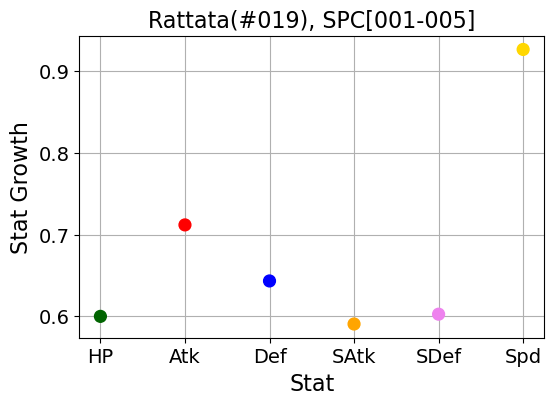

In [17]:
defs = mpl.rcParams['lines.markersize'] ** 2
plt.scatter(labelVec, growthRate, color = colorVec, s = defs * 2, zorder = 2)

plt.title('Rattata(#019), SPC[001-005]')
plt.xlabel('Stat')
plt.ylabel('Stat Growth')

txtm = 1

SMALL_SIZE = 14 * txtm
MEDIUM_SIZE = 16 * txtm
BIGGER_SIZE = 20 * txtm

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.grid(zorder = 1)
plt.savefig('rattata019_statGrowths_LOWRES.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

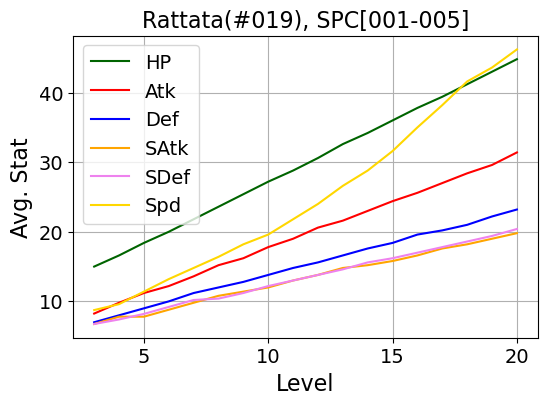

In [18]:
for indx in statRanger:
    plt.plot(levelsGlobal, dataVec[indx], color = colorVec[indx], label = labelVec[indx])

plt.title('Rattata(#019), SPC[001-005]')
plt.xlabel('Level')
plt.ylabel('Avg. Stat')

txtm = 1

SMALL_SIZE = 14 * txtm
MEDIUM_SIZE = 16 * txtm
BIGGER_SIZE = 20 * txtm

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.legend()
plt.grid()
plt.savefig('rattata019_stats_LOWRES.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()